In [112]:
import pandas as pd
import numpy as np
import requests
from pathlib import Path


import os
from dotenv import load_dotenv

load_dotenv()
# env_path = Path(__file__).resolve().parent.parent / ".env"
# load_dotenv(dotenv_path=env_path)
# api_key = os.getenv("API_KEY")
API_KEY="e90aaf9b1330cda620b72f9852223986"


url = "https://api.themoviedb.org/3/movie/{}?api_key={}&append_to_response=credits" 

movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397,
 420818, 24428, 168259, 99861, 284054, 12445,
 181808, 330457, 351286, 109445, 321612, 260513]  

data = []

for movie_id in movie_ids:
    response = requests.get(url.format(movie_id, API_KEY))
    if response.status_code == 200:
        data.append(response.json())

df = pd.DataFrame(data)
print(df.head())

   adult                     backdrop_path   
0  False  /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg  \
1  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg   
2  False  /k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg   
3  False  /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg   
4  False  /sCzcYW9h55WcesOqA12cgEr9Exw.jpg   

                               belongs_to_collection     budget   
0  {'id': 86311, 'name': 'The Avengers Collection...  356000000  \
1  {'id': 87096, 'name': 'Avatar Collection', 'po...  237000000   
2  {'id': 10, 'name': 'Star Wars Collection', 'po...  245000000   
3  {'id': 86311, 'name': 'The Avengers Collection...  300000000   
4                                               None  200000000   

                                              genres   
0  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...  \
1  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
2  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
3  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
4  [{'id': 18, 'name': 'Drama'}, {'id': 

In [113]:
df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'origin_country', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'credits'],
      dtype='object')

In [114]:
df["credits"]

0     {'cast': [{'adult': False, 'gender': 2, 'id': ...
1     {'cast': [{'adult': False, 'gender': 2, 'id': ...
2     {'cast': [{'adult': False, 'gender': 2, 'id': ...
3     {'cast': [{'adult': False, 'gender': 2, 'id': ...
4     {'cast': [{'adult': False, 'gender': 2, 'id': ...
5     {'cast': [{'adult': False, 'gender': 2, 'id': ...
6     {'cast': [{'adult': False, 'gender': 2, 'id': ...
7     {'cast': [{'adult': False, 'gender': 2, 'id': ...
8     {'cast': [{'adult': False, 'gender': 2, 'id': ...
9     {'cast': [{'adult': False, 'gender': 2, 'id': ...
10    {'cast': [{'adult': False, 'gender': 2, 'id': ...
11    {'cast': [{'adult': False, 'gender': 2, 'id': ...
12    {'cast': [{'adult': False, 'gender': 2, 'id': ...
13    {'cast': [{'adult': False, 'gender': 1, 'id': ...
14    {'cast': [{'adult': False, 'gender': 2, 'id': ...
15    {'cast': [{'adult': False, 'gender': 1, 'id': ...
16    {'cast': [{'adult': False, 'gender': 1, 'id': ...
17    {'cast': [{'adult': False, 'gender': 2, 'i

In [115]:
data = df.copy()
columns_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
df.drop(columns=columns_to_drop, inplace=True)
df.head(2)


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,[US],en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.238,26206,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",31.3525,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.588,32108,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [116]:
def drop_columns(df, columns_to_drop):
    df.drop(columns=columns_to_drop, inplace=True)
    return df

columns_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
drop_columns(df, columns_to_drop)

KeyError: "['adult', 'imdb_id', 'original_title', 'video', 'homepage'] not found in axis"

In [ ]:

import ast

# Function to safely evaluate and extract a specific key
def extract_name_from_dict(obj, key='name'):
    try:
        obj = ast.literal_eval(obj) if isinstance(obj, str) else obj
        if isinstance(obj, dict):
            return obj.get(key)
        elif isinstance(obj, list):
            return '|'.join(item.get(key, '') for item in obj if isinstance(item, dict))
    except:
        return None

# Clean and extract values from each column
df['collection_name'] = df['belongs_to_collection'].apply(lambda x: extract_name_from_dict(x))
df['genres_clean'] = df['genres'].apply(lambda x: extract_name_from_dict(x))
df['spoken_languages_clean'] = df['spoken_languages'].apply(lambda x: extract_name_from_dict(x))
df['production_countries_clean'] = df['production_countries'].apply(lambda x: extract_name_from_dict(x))
df['production_companies_clean'] = df['production_companies'].apply(lambda x: extract_name_from_dict(x))
df.head()


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,...,tagline,title,vote_average,vote_count,credits,collection_name,genres_clean,spoken_languages_clean,production_countries_clean,production_companies_clean
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,[US],en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,...,Avenge the fallen.,Avengers: Endgame,8.238,26206,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure|Science Fiction|Action,English|日本語|,United States of America,Marvel Studios
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",31.3525,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,...,Enter the world of Pandora.,Avatar,7.588,32108,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action|Adventure|Fantasy|Science Fiction,English|Español,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,[US],en,Thirty years after defeating the Galactic Empi...,12.7841,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,...,Every generation has a story.,Star Wars: The Force Awakens,7.262,19665,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Adventure|Action|Science Fiction,English,United States of America,Lucasfilm Ltd.|Bad Robot
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,[US],en,As the Avengers and their allies have continue...,32.6907,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,...,Destiny arrives all the same.,Avengers: Infinity War,8.236,30386,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure|Action|Science Fiction,English|,United States of America,Marvel Studios
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,31.6333,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,...,Nothing on Earth could come between them.,Titanic,7.905,25865,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",None,Drama|Romance,English|Français|Deutsch|svenska|Italiano|Pусский,United States of America,Paramount Pictures|20th Century Fox|Lightstorm...


In [ ]:
df.drop(columns=[
    'belongs_to_collection',
    'genres',
    'production_countries',
    'production_companies',
    'spoken_languages'
], inplace=True)


In [ ]:
# Convert budget, id, and popularity to numeric
cols_to_numeric = ['budget', 'id', 'popularity']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # invalid entries become NaN

# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')  # invalid dates become NaT


In [ ]:
df.dtypes

backdrop_path                         object
budget                                 int64
id                                     int64
origin_country                        object
original_language                     object
overview                              object
popularity                           float64
poster_path                           object
release_date                  datetime64[ns]
revenue                                int64
runtime                                int64
status                                object
tagline                               object
title                                 object
vote_average                         float64
vote_count                             int64
credits                               object
collection_name                       object
genres_clean                          object
spoken_languages_clean                object
production_countries_clean            object
production_companies_clean            object
dtype: obj

In [ ]:
df[['overview', 'tagline']]

,overview,tagline
0,After the devastating events of Avengers: Infi...,Avenge the fallen.
1,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.
2,Thirty years after defeating the Galactic Empi...,Every generation has a story.
3,As the Avengers and their allies have continue...,Destiny arrives all the same.
4,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.
5,Twenty-two years after the events of Jurassic ...,The park is open.
6,"Simba idolizes his father, King Mufasa, and ta...",The king has returned.
7,When an unexpected enemy emerges and threatens...,Some assembly required.
8,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance hits home.
9,When Tony Stark tries to jumpstart a dormant p...,A new age has come.


In [ ]:


# 1. Replace 0 with NaN in budget, revenue, runtime
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
df['runtime'] = df['runtime'].replace(0, np.nan)

# 2. Convert budget and revenue to millions USD
df['budget'] = df['budget'] / 1_000_000
df['revenue'] = df['revenue'] / 1_000_000

# 3. vote_count = 0 → set vote_average to NaN
df.loc[df['vote_count'] == 0, 'vote_average'] = np.nan

# 4. Clean 'overview' and 'tagline' placeholders
placeholders = ['No Data', 'no data', '', 'nan', 'N/A', 'None']
df['overview'] = df['overview'].replace(placeholders, np.nan)
df['tagline'] = df['tagline'].replace(placeholders, np.nan)


In [ ]:
# Remove duplicate rows based on 'id' and 'title'
df.drop_duplicates(subset=['id', 'title'], inplace=True)

# Drop rows where 'id' or 'title' is missing
df.dropna(subset=['id', 'title'], inplace=True)


In [ ]:
# Keep only rows where at least 10 columns have non-NaN values
df = df[df.notna().sum(axis=1) >= 10]

# Keep only movies where 'status' is 'Released'
df = df[df['status'] == 'Released']

# Drop the 'status' column
df.drop(columns=['status'], inplace=True)
df.head(2)

,backdrop_path,budget,id,origin_country,original_language,overview,popularity,poster_path,release_date,revenue,...,tagline,title,vote_average,vote_count,credits,collection_name,genres_clean,spoken_languages_clean,production_countries_clean,production_companies_clean
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356.0,299534,[US],en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799.439100,...,Avenge the fallen.,Avengers: Endgame,8.238,26206,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure|Science Fiction|Action,English|日本語|,United States of America,Marvel Studios
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237.0,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",31.3525,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,2009-12-15,2923.706026,...,Enter the world of Pandora.,Avatar,7.588,32108,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action|Adventure|Fantasy|Science Fiction,English|Español,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...


In [ ]:
df.columns

Index(['backdrop_path', 'budget', 'id', 'origin_country', 'original_language',
       'overview', 'popularity', 'poster_path', 'release_date', 'revenue',
       'runtime', 'tagline', 'title', 'vote_average', 'vote_count', 'credits',
       'collection_name', 'genres_clean', 'spoken_languages_clean',
       'production_countries_clean', 'production_companies_clean'],
      dtype='object')

In [ ]:
df.rename(columns={
    'collection_name': 'belongs_to_collection',
    'genres_clean': 'genres',
    'spoken_languages_clean': 'spoken_languages',
    'production_countries_clean': 'production_countries',
    'production_companies_clean': 'production_companies',
    'budget': 'budget_musd',
    'revenue': 'revenue_musd'
}, inplace=True)


In [ ]:
df.head(2)

,backdrop_path,budget_musd,id,origin_country,original_language,overview,popularity,poster_path,release_date,revenue_musd,...,tagline,title,vote_average,vote_count,credits,belongs_to_collection,genres,spoken_languages,production_countries,production_companies
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356.0,299534,[US],en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799.439100,...,Avenge the fallen.,Avengers: Endgame,8.238,26206,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure|Science Fiction|Action,English|日本語|,United States of America,Marvel Studios
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237.0,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",31.3525,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,2009-12-15,2923.706026,...,Enter the world of Pandora.,Avatar,7.588,32108,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action|Adventure|Fantasy|Science Fiction,English|Español,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...


In [ ]:
df["credits"]

0     {'cast': [{'adult': False, 'gender': 2, 'id': ...
1     {'cast': [{'adult': False, 'gender': 2, 'id': ...
2     {'cast': [{'adult': False, 'gender': 2, 'id': ...
3     {'cast': [{'adult': False, 'gender': 2, 'id': ...
4     {'cast': [{'adult': False, 'gender': 2, 'id': ...
5     {'cast': [{'adult': False, 'gender': 2, 'id': ...
6     {'cast': [{'adult': False, 'gender': 2, 'id': ...
7     {'cast': [{'adult': False, 'gender': 2, 'id': ...
8     {'cast': [{'adult': False, 'gender': 2, 'id': ...
9     {'cast': [{'adult': False, 'gender': 2, 'id': ...
10    {'cast': [{'adult': False, 'gender': 2, 'id': ...
11    {'cast': [{'adult': False, 'gender': 2, 'id': ...
12    {'cast': [{'adult': False, 'gender': 2, 'id': ...
13    {'cast': [{'adult': False, 'gender': 1, 'id': ...
14    {'cast': [{'adult': False, 'gender': 2, 'id': ...
15    {'cast': [{'adult': False, 'gender': 1, 'id': ...
16    {'cast': [{'adult': False, 'gender': 1, 'id': ...
17    {'cast': [{'adult': False, 'gender': 2, 'i

In [ ]:
import ast

# Convert JSON-like strings into actual Python dicts
df['credits'] = df['credits'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [ ]:
df["credits"]

0     {'cast': [{'adult': False, 'gender': 2, 'id': ...
1     {'cast': [{'adult': False, 'gender': 2, 'id': ...
2     {'cast': [{'adult': False, 'gender': 2, 'id': ...
3     {'cast': [{'adult': False, 'gender': 2, 'id': ...
4     {'cast': [{'adult': False, 'gender': 2, 'id': ...
5     {'cast': [{'adult': False, 'gender': 2, 'id': ...
6     {'cast': [{'adult': False, 'gender': 2, 'id': ...
7     {'cast': [{'adult': False, 'gender': 2, 'id': ...
8     {'cast': [{'adult': False, 'gender': 2, 'id': ...
9     {'cast': [{'adult': False, 'gender': 2, 'id': ...
10    {'cast': [{'adult': False, 'gender': 2, 'id': ...
11    {'cast': [{'adult': False, 'gender': 2, 'id': ...
12    {'cast': [{'adult': False, 'gender': 2, 'id': ...
13    {'cast': [{'adult': False, 'gender': 1, 'id': ...
14    {'cast': [{'adult': False, 'gender': 2, 'id': ...
15    {'cast': [{'adult': False, 'gender': 1, 'id': ...
16    {'cast': [{'adult': False, 'gender': 1, 'id': ...
17    {'cast': [{'adult': False, 'gender': 2, 'i

In [ ]:
df1 = df.copy()

In [ ]:
def extract_cast_crew_info(credits_dict):
    """
    Extracts top 5 cast names, cast size, director name, and crew size from credits dict.
    """
    if not isinstance(credits_dict, dict):
        return pd.Series([None, None, None, None], index=['cast', 'cast_size', 'director', 'crew_size'])

    cast_list = credits_dict.get('cast', [])
    crew_list = credits_dict.get('crew', [])

    # Get top 5 cast names
    cast_names = [member['name'] for member in cast_list[:5] if 'name' in member]

    # Get director(s)
    directors = [member['name'] for member in crew_list if member.get('job') == 'Director']

    return pd.Series([
        '|'.join(cast_names),
        len(cast_list),
        directors[0] if directors else None,
        len(crew_list)
    ], index=['cast', 'cast_size', 'director', 'crew_size'])


cast_crew_df = df1['credits'].apply(extract_cast_crew_info)

# Merge with your main dataframe
df1 = pd.concat([df1, cast_crew_df], axis=1)

df1.head()




,backdrop_path,budget_musd,id,origin_country,original_language,overview,popularity,poster_path,release_date,revenue_musd,...,production_countries,production_companies,cast,cast_size,director,crew_size,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356.0,299534,[US],en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799.439100,...,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,593,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237.0,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",31.3525,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,2009-12-15,2923.706026,...,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,245.0,140607,[US],en,Thirty years after defeating the Galactic Empi...,12.7841,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,2015-12-15,2068.223624,...,United States of America,Lucasfilm Ltd.|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300.0,299536,[US],en,As the Avengers and their allies have continue...,32.6907,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,2052.415039,...,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo,724,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo,724
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,200.0,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,31.6333,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,1997-11-18,2264.162353,...,United States of America,Paramount Pictures|20th Century Fox|Lightstorm...,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


In [118]:
df = df1

In [119]:
df.columns

Index(['backdrop_path', 'budget_musd', 'id', 'origin_country',
       'original_language', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue_musd', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count', 'credits', 'belongs_to_collection',
       'genres', 'spoken_languages', 'production_countries',
       'production_companies', 'cast', 'cast_size', 'director', 'crew_size',
       'cast', 'cast_size', 'director', 'crew_size'],
      dtype='object')

In [121]:
data_copy1 = df1.copy()
data_copy1.head(1)

,backdrop_path,budget_musd,id,origin_country,original_language,overview,popularity,poster_path,release_date,revenue_musd,...,production_countries,production_companies,cast,cast_size,director,crew_size,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356.0,299534,[US],en,After the devastating events of Avengers: Infi...,22.2597,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799.4391,...,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,593,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,593


In [141]:
df = df1
df.columns

Index(['backdrop_path', 'budget_musd', 'id', 'origin_country',
       'original_language', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue_musd', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count', 'credits', 'belongs_to_collection',
       'genres', 'spoken_languages', 'production_countries',
       'production_companies', 'cast', 'cast_size', 'director', 'crew_size',
       'cast', 'cast_size', 'director', 'crew_size'],
      dtype='object')

In [142]:
# Define the desired column order
column_order = [
    'id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
    'original_language', 'budget_musd', 'revenue_musd', 'production_companies',
    'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime',
    'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size'
]

# Reorder the DataFrame
df = df[column_order]

df.columns


Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast', 'cast_size',
       'cast_size', 'director', 'director', 'crew_size', 'crew_size'],
      dtype='object')

In [144]:
df.reset_index(drop=True, inplace=True)
df.head(1)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,spoken_languages,poster_path,cast,cast,cast_size,cast_size,director,director,crew_size,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.4391,Marvel Studios,...,English|日本語|,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,105,Anthony Russo,Anthony Russo,593,593


In [145]:
def rank_movies(df, column, top_n=10, ascending=False, filter_condition=None):
    """
    Ranks movies by a specific column with optional filtering.

    Parameters:
        df (DataFrame): your movie dataset
        column (str): column to rank by
        top_n (int): number of top results
        ascending (bool): sort ascending (lowest first)
        filter_condition (str): pandas query string (optional)

    Returns:
        DataFrame: top ranked movies by specified column
    """
    filtered_df = df.query(filter_condition) if filter_condition else df
    ranked_df = filtered_df.sort_values(by=column, ascending=ascending)
    return ranked_df[['title', column]].head(top_n)


In [146]:
def rank_movies(df, column, top_n=10, ascending=False, filter_condition=None):
    """
    Ranks movies by a specific column with optional filtering.

    Parameters:
        df (DataFrame): your movie dataset
        column (str): column to rank by
        top_n (int): number of top results
        ascending (bool): sort ascending (lowest first)
        filter_condition (str): pandas query string (optional)

    Returns:
        DataFrame: top ranked movies by specified column
    """
    filtered_df = df.query(filter_condition) if filter_condition else df
    ranked_df = filtered_df.sort_values(by=column, ascending=ascending)
    return ranked_df[['title', column]].head(top_n)


In [147]:
# Highest Revenue
rank_movies(df, 'revenue_musd')

# Highest Budget
rank_movies(df, 'budget_musd')

# Highest Profit
df['profit_musd'] = df['revenue_musd'] - df['budget_musd']
rank_movies(df, 'profit_musd')

# Lowest Profit
rank_movies(df, 'profit_musd', ascending=True)

# Highest ROI (only budget ≥ 10M)
df['roi'] = df['revenue_musd'] / df['budget_musd']
rank_movies(df, 'roi', filter_condition='budget_musd >= 10')

# Lowest ROI
rank_movies(df, 'roi', ascending=True, filter_condition='budget_musd >= 10')

# Most Voted Movies
rank_movies(df, 'vote_count')

# Highest Rated Movies (≥10 votes)
rank_movies(df, 'vote_average', filter_condition='vote_count >= 10')

# Lowest Rated Movies (≥10 votes)
rank_movies(df, 'vote_average', ascending=True, filter_condition='vote_count >= 10')

# Most Popular
rank_movies(df, 'popularity')


C:\Users\USER\AppData\Local\Temp\ipykernel_21000\1675941517.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profit_musd'] = df['revenue_musd'] - df['budget_musd']
C:\Users\USER\AppData\Local\Temp\ipykernel_21000\1675941517.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roi'] = df['revenue_musd'] / df['budget_musd']


,title,popularity
7,The Avengers,33.8215
3,Avengers: Infinity War,32.6907
4,Titanic,31.6333
1,Avatar,31.3525
6,The Lion King,22.2842
0,Avengers: Endgame,22.2597
15,Frozen,20.7782
5,Jurassic World,19.5099
10,Black Panther,18.2929
11,Harry Potter and the Deathly Hallows: Part 2,18.2595


In [128]:
# Highest Revenue
rank_movies(df, 'revenue_musd')

# Highest Budget
rank_movies(df, 'budget_musd')

# Highest Profit
df.loc[:, 'profit_musd'] = df['revenue_musd'] - df['budget_musd']
rank_movies(df, 'profit_musd')

# Lowest Profit
rank_movies(df, 'profit_musd', ascending=True)

# Highest ROI (only budget ≥ 10M)
df.loc[:, 'roi'] = df['revenue_musd'] / df['budget_musd']
rank_movies(df, 'roi', filter_condition='budget_musd >= 10')

# Lowest ROI
rank_movies(df, 'roi', ascending=True, filter_condition='budget_musd >= 10')

# Most Voted Movies
rank_movies(df, 'vote_count')

# Highest Rated Movies (≥10 votes)
rank_movies(df, 'vote_average', filter_condition='vote_count >= 10')

# Lowest Rated Movies (≥10 votes)
rank_movies(df, 'vote_average', ascending=True, filter_condition='vote_count >= 10')

# Most Popular
rank_movies(df, 'popularity')


,title,popularity
7,The Avengers,33.8215
3,Avengers: Infinity War,32.6907
4,Titanic,31.6333
1,Avatar,31.3525
6,The Lion King,22.2842
0,Avengers: Endgame,22.2597
15,Frozen,20.7782
5,Jurassic World,19.5099
10,Black Panther,18.2929
11,Harry Potter and the Deathly Hallows: Part 2,18.2595


In [148]:
rank_movies(df, 'revenue_musd')

,title,revenue_musd
1,Avatar,2923.706026
0,Avengers: Endgame,2799.439100
4,Titanic,2264.162353
2,Star Wars: The Force Awakens,2068.223624
3,Avengers: Infinity War,2052.415039
5,Jurassic World,1671.537444
6,The Lion King,1662.020819
7,The Avengers,1518.815515
8,Furious 7,1515.400000
13,Frozen II,1453.683476


In [149]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast', 'cast_size',
       'cast_size', 'director', 'director', 'crew_size', 'crew_size',
       'profit_musd', 'roi'],
      dtype='object')

In [130]:
df.head(1)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,cast,cast,cast_size,cast_size,director,director,crew_size,crew_size,profit_musd,roi
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.4391,Marvel Studios,...,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,105,Anthony Russo,Anthony Russo,593,593,2443.4391,7.863593


In [132]:
df.head(1)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,cast,cast,cast_size,cast_size,director,director,crew_size,crew_size,profit_musd,roi
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.4391,Marvel Studios,...,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,105,Anthony Russo,Anthony Russo,593,593,2443.4391,7.863593


In [152]:
df["belongs_to_collection"]

0                 The Avengers Collection
1                       Avatar Collection
2                    Star Wars Collection
3                 The Avengers Collection
4                                    None
5                Jurassic Park Collection
6       The Lion King (Reboot) Collection
7                 The Avengers Collection
8     The Fast and the Furious Collection
9                 The Avengers Collection
10               Black Panther Collection
11                Harry Potter Collection
12                   Star Wars Collection
13                      Frozen Collection
14               Jurassic Park Collection
15                      Frozen Collection
16                                   None
17             The Incredibles Collection
Name: belongs_to_collection, dtype: object

In [153]:
# Convert 'None' strings to actual NaN
df['belongs_to_collection'].replace('None', pd.NA, inplace=True)

# Create is_franchise column
df['is_franchise'] = df['belongs_to_collection'].notna()

# Grouping for comparisons
comparison = df.groupby('is_franchise').agg({
    'revenue_musd': 'mean',
    'roi': 'median',
    'budget_musd': 'mean',
    'popularity': 'mean',
    'vote_average': 'mean'
}).rename(index={True: 'Franchise', False: 'Standalone'})

comparison


C:\Users\USER\AppData\Local\Temp\ipykernel_21000\3648101031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['belongs_to_collection'].replace('None', pd.NA, inplace=True)


,revenue_musd,roi,budget_musd,popularity,vote_average
is_franchise,,,,,
Standalone,1765.139159,9.617018,180.000,24.370950,7.43800
Franchise,1682.641971,7.786109,219.875,19.527856,7.37775


In [135]:
comparison

,revenue_musd,roi,budget_musd,popularity,vote_average
is_franchise,,,,,
Standalone,1765.139159,9.617018,180.000,24.370950,7.43800
Franchise,1682.641971,7.786109,219.875,19.527856,7.37775


In [154]:
print(df.columns)


Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast', 'cast_size',
       'cast_size', 'director', 'director', 'crew_size', 'crew_size',
       'profit_musd', 'roi', 'is_franchise'],
      dtype='object')


In [137]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,cast,cast_size,cast_size,director,director,crew_size,crew_size,profit_musd,roi,is_franchise
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,105,Anthony Russo,Anthony Russo,593,593,2443.439100,7.863593,True
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,65,James Cameron,James Cameron,986,986,2686.706026,12.336312,True
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,182,J.J. Abrams,J.J. Abrams,257,257,1823.223624,8.441729,True
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,69,Anthony Russo,Anthony Russo,724,724,1752.415039,6.841383,True
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,None,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,116,James Cameron,James Cameron,258,258,2064.162353,11.320812,False


In [155]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast', 'cast_size',
       'cast_size', 'director', 'director', 'crew_size', 'crew_size',
       'profit_musd', 'roi', 'is_franchise'],
      dtype='object')

In [156]:




# Convert 'None' strings to NaN
df['belongs_to_collection'].replace('None', pd.NA, inplace=True)

# Drop rows without franchise info
franchise_df = df[df['belongs_to_collection'].notna()]

# Group by franchise name and compute required metrics
top_franchises = franchise_df.groupby('belongs_to_collection').agg(
    number_of_movies=('id', 'count'),
    total_budget=('budget_musd', 'sum'),
    mean_budget=('budget_musd', 'mean'),
    total_revenue=('revenue_musd', 'sum'),
    mean_revenue=('revenue_musd', 'mean'),
    mean_rating=('vote_average', 'mean')
).sort_values(by='total_revenue', ascending=False)

top_franchises.head(10)  # Show top 10 successful franchises


C:\Users\USER\AppData\Local\Temp\ipykernel_21000\2166059253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['belongs_to_collection'].replace('None', pd.NA, inplace=True)


,number_of_movies,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
belongs_to_collection,,,,,,
The Avengers Collection,4,1241.0,310.25,7776.073348,1944.018337,7.86975
Star Wars Collection,2,445.0,222.50,3400.922454,1700.461227,7.02050
Jurassic Park Collection,2,320.0,160.00,2982.003740,1491.001870,6.61900
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.58800
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.22500
The Lion King (Reboot) Collection,1,260.0,260.00,1662.020819,1662.020819,7.10900
The Fast and the Furious Collection,1,190.0,190.00,1515.400000,1515.400000,7.22500
Black Panther Collection,1,200.0,200.00,1349.926083,1349.926083,7.37300
Harry Potter Collection,1,125.0,125.00,1341.511219,1341.511219,8.08700


In [157]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast', 'cast_size',
       'cast_size', 'director', 'director', 'crew_size', 'crew_size',
       'profit_musd', 'roi', 'is_franchise'],
      dtype='object')

In [158]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,cast,cast_size,cast_size,director,director,crew_size,crew_size,profit_musd,roi,is_franchise
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,105,Anthony Russo,Anthony Russo,593,593,2443.439100,7.863593,True
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,65,James Cameron,James Cameron,986,986,2686.706026,12.336312,True
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,182,J.J. Abrams,J.J. Abrams,257,257,1823.223624,8.441729,True
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,69,Anthony Russo,Anthony Russo,724,724,1752.415039,6.841383,True
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,None,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,116,James Cameron,James Cameron,258,258,2064.162353,11.320812,False


In [159]:
df = df.loc[:, ~df.columns.duplicated()]


print(df.columns)

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director',
       'crew_size', 'profit_musd', 'roi', 'is_franchise'],
      dtype='object')


In [160]:
# Group by director
director_success = df.groupby('director').agg(
    total_movies=('id', 'count'),
    total_revenue=('revenue_musd', 'sum'),
    mean_rating=('vote_average', 'mean')
).sort_values(by='total_revenue', ascending=False)

# Show top 10 successful directors
director_success.head(10)


,total_movies,total_revenue,mean_rating
director,,,
James Cameron,2,5187.868379,7.7465
Anthony Russo,2,4851.854139,8.2370
Joss Whedon,2,2924.219209,7.5025
J.J. Abrams,1,2068.223624,7.2620
Colin Trevorrow,1,1671.537444,6.7000
Jon Favreau,1,1662.020819,7.1090
James Wan,1,1515.400000,7.2250
Jennifer Lee,1,1453.683476,7.2500
Ryan Coogler,1,1349.926083,7.3730


In [164]:
!pip install seaborn

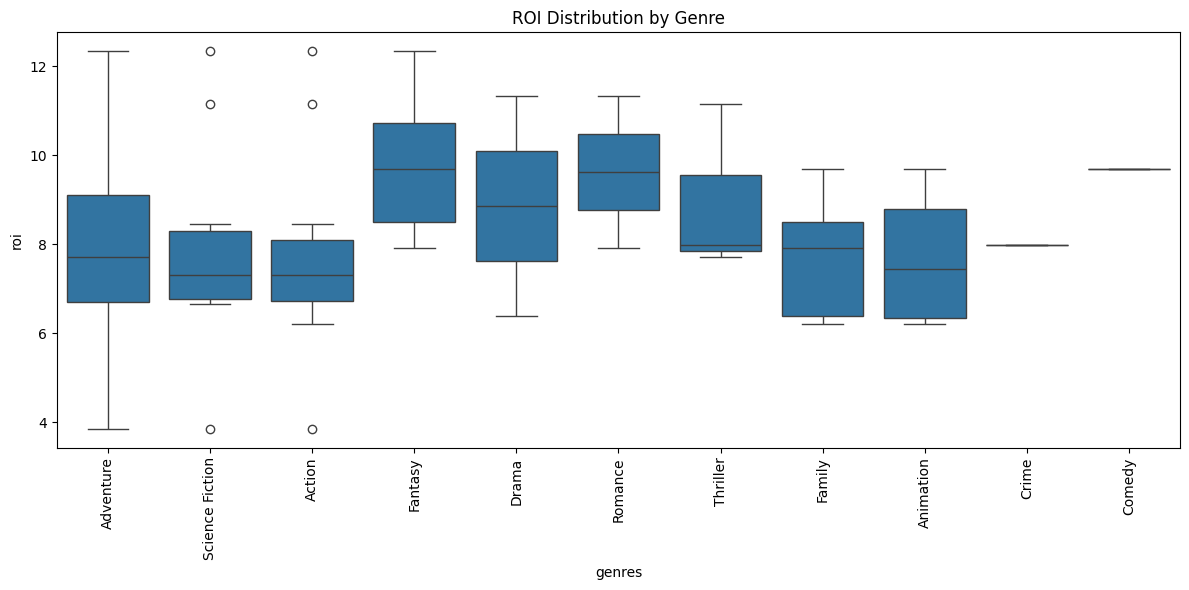

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# ROI Distribution by Genre
plt.figure(figsize=(12, 6))
df_exploded = df.copy()
df_exploded['genres'] = df_exploded['genres'].str.split('|')
df_exploded = df_exploded.explode('genres')
sns.boxplot(data=df_exploded, x='genres', y='roi')
plt.xticks(rotation=90)
plt.title('ROI Distribution by Genre')
plt.tight_layout()
plt.show()


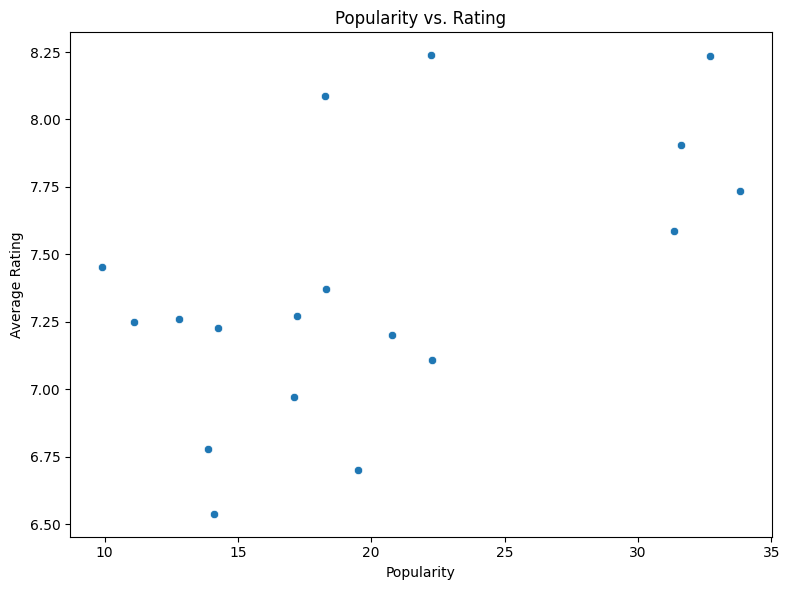

In [166]:
# Popularity vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='popularity', y='vote_average')
plt.title('Popularity vs. Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()


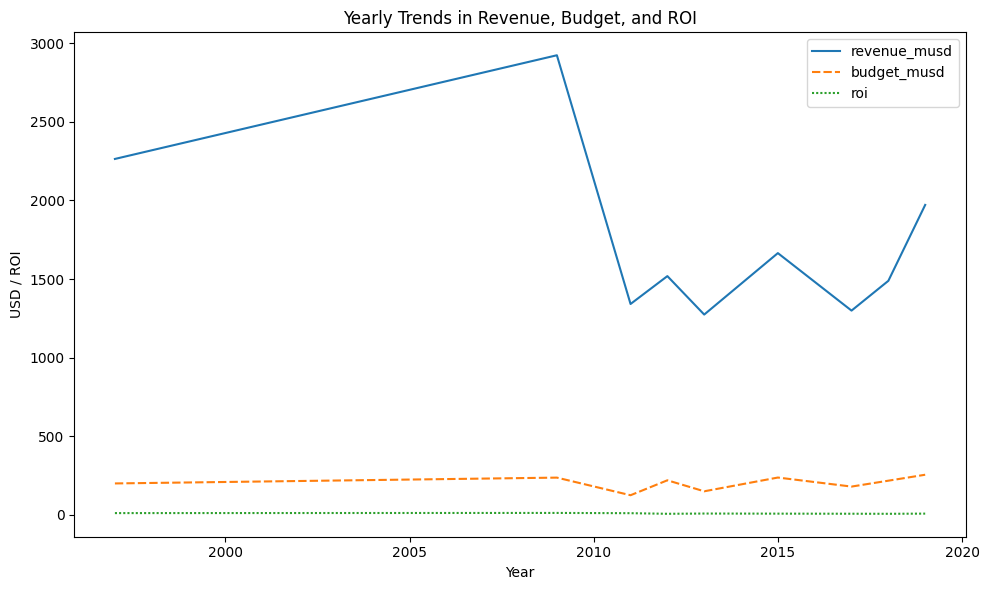

In [167]:
# Yearly Trends in Box Office Performance
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
yearly = df.groupby('release_year').agg({
    'revenue_musd': 'mean',
    'budget_musd': 'mean',
    'roi': 'mean'
}).dropna()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly[['revenue_musd', 'budget_musd', 'roi']])
plt.title('Yearly Trends in Revenue, Budget, and ROI')
plt.xlabel('Year')
plt.ylabel('USD / ROI')
plt.tight_layout()
plt.show()

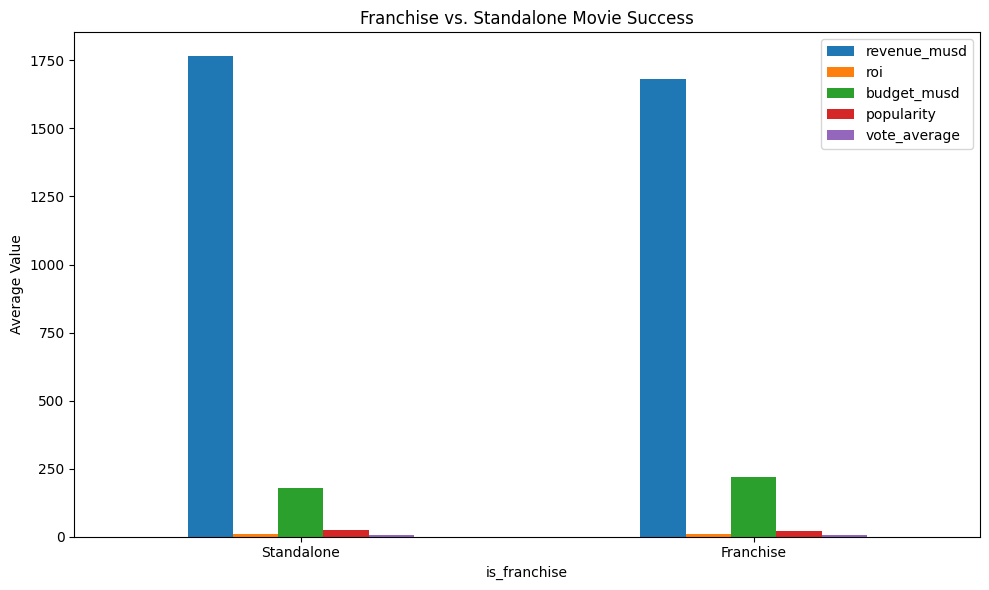

In [168]:
# Franchise vs. Standalone Success
comparison = df.groupby('is_franchise').agg({
    'revenue_musd': 'mean',
    'roi': 'median',
    'budget_musd': 'mean',
    'popularity': 'mean',
    'vote_average': 'mean'
}).rename(index={True: 'Franchise', False: 'Standalone'})

comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Franchise vs. Standalone Movie Success')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()